# Nominal Calculations, Tornado Plots, and Two Dimentional Sensitivity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Nominal Case Analysis

This section of code shows the calculations of energy intensity, GHG emissions intensity, land-use intensity, and artificial carbohydrate cost using the nominal values from Table S1 in the SI.

### Energy Intensity

In [105]:
def energy_intensity(E_DAC=243, E_H2O=0.4, E_reaction=7863, water_efficiency=1,n=6,mw=180):
    '''Calculates the total energy intensity of artificial carbohydrate production, Eq 4 in the SI
        
          Arguments:  
              E_DAC: DAC energy requirement (kJ/mol of CO2)
              E_H2O: Water desalination energy requirement (kJ/mol of H2O)
              E_reaction: Reaction energy requirement (kJ/mol carbohydrate) 
              water_efficiency: Water use efficiency (dimentionless)
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              mw: Molecular weight of carbohydrate (g/mol)
        
          Returns:
              Total energy intensity (kJ/kg carbohydrate)
             
          '''
    energy = (E_DAC*n + E_H2O*n*water_efficiency + E_reaction)/mw*1000   #KJ/Kg
    return energy
 

Energy_Intensity = energy_intensity()
print('Nominal energy intensity',np.round(Energy_Intensity,2),'kJ / kg glucose',',', np.round((Energy_Intensity/1000000) * 2.778e-7 * 1e12,2), 'TWh / Gt glucose')

Nominal energy intensity 51796.67 kJ / kg glucose , 14389.11 TWh / Gt glucose


### Artificial Carbohydrate Cost

In [5]:
def carb_cost(energy=Energy_Intensity, energy_cost=80):
     '''Calculates the cost of artificial carbohydrate production, Eq 5 in the SI
        
          Arguments:  
              energy: Total energy intensity (kJ/kg carbohydrate)
              energy_cost: Cost of electricity ($/MWh)
        
          Returns:
              Artificial carbohydrate cost ($/Gt carbohydrate)
             
          '''   
    Cost = (energy * 2.778e-7 *1e12)*energy_cost
    return Cost
    


Artificial_carb_cost = carb_cost()
print('Nominal estimated cost of carbohydrate',np.round(Artificial_carb_cost/1e12,2),'Trillion $ / Gt glucose',np.round(Artificial_carb_cost/1e12,2),'$ / kg glucose' )

Nominal estimated cost of carbohydrate 1.15 Trillion $ / Gt glucose 1.15 $ / kg glucose


### GHG Emissions Intensity

In [106]:
def emissions_intensity(mw_CO2=44, mw=180, n=6, CO2_intensity=10,energy=Energy_Intensity):
    '''Calculates the GHG emissions intensity of artificial carbohydrate production, Eqs 6-8 in the SI
        
          Arguments:  
              mw_CO2: Molecular weight of CO2 (g/mol)
              mw: Molecular weight of carbohydrate (g/mol)
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              CO2_intensity: CO2 intensity of electricity source (gCO2eq/kWh)
              energy: Total energy intensity (kJ/kg carbohydrate)
        
          Returns:
              GHG emissions intensity(kg CO2eq/kg carbohydrate)
              CO2 consumed in reaction (kg CO2/kg carbohydrate)
              CO2 produced by electricity consumption (kg CO2eq/kg carbohydrate)
             
          '''
    CO2_consumed = n*mw_CO2/mw #kg of CO2 per kg carb
    CO2_emission_estimate = energy*CO2_intensity/1000/3600 #kg CO2 / kg carb
    CO2_emissions = CO2_emission_estimate - CO2_consumed
    return CO2_emissions, CO2_consumed, CO2_emission_estimate
    
    
GHG_emissions_intensity = emissions_intensity()
print('CO2 consumed by reaction',np.round(GHG_emissions_intensity[1],2),'kg CO2 / kg glucose')
print('CO2 produced by solar powered electricty', np.round(GHG_emissions_intensity[2],2),'kg CO2 / kg glucose')
print('Nominal GHG emissions intensity', np.round(GHG_emissions_intensity[0],2), 'kg CO2 / kg glucose', ',',np.round(GHG_emissions_intensity[0],2),'Gt CO2 / Gt glucose')


CO2 consumed by reaction 1.47 kg CO2 / kg glucose
CO2 produced by solar powered electricty 0.14 kg CO2 / kg glucose
Nominal GHG emissions intensity -1.32 kg CO2 / kg glucose , -1.32 Gt CO2 / Gt glucose


### Water-use Intensity

In [108]:
def water_use(n=6,mw=180, mw_H2O=18, water_efficiency=1):
    '''Calculates the water-use intensity of artificial carbohydrate production, Eq 9 in the SI
        
          Arguments:  
              n: Stoichiometry of H2O:carb and CO2:carb (dimentionless)
              mw: Molecular weight of carbohydrate (g/mol)
              mw_H2O: Molecular weight of water (g/mol) 
              water_efficiency: Water use efficiency (dimentionless)
        
          Returns:
              Water-use intensity (kg H2O/kg carbohydrate)
             
          '''
    Water_intensity = n*mw_H2O/mw 
    return Water_intensity


Water_use_intensity = water_use()

print('Nominal water-use intensity', Water_use_intensity, 'kg water/kg glucose',',', Water_use_intensity, 'Gt water/Gt glucose')

Nominal water-use intensity 0.6 kg water/kg glucose , 0.6 Gt water/Gt glucose


### Land-use Intensity

In [4]:
def land_intensity(energy=Energy_Intensity,lau=500):
  '''Calculates the land-use intensity of artificial carbohydrate production, Eq 10 in the SI
        
          Arguments:  
              energy: Total energy intensity (kJ/kg carbohydrate)
              lau: Land-use factor of solar field (m2/GWh)
        
          Returns:
              Land-use intensity (hectares/Gt carbohydrate)
             
          '''   
  land_use = (energy/1000000 * 2.778e-7 * 1e12 ) * lau * .1
  return land_use


Land_use_intensity = land_intensity()

print('Nominal land-use intensity from solar fields', np.round(Land_use_intensity/1e6,2), 'million hectares / Gt glucose')

Nominal land-use intensity from solar fields 0.72 million hectares / Gt glucose


## Tornado Diagrams

This section code generates the tornado diagrams in Figure 1.

### Energy Intensity, Panel (a)

In [6]:
#Parameter Variation
#Parameter: DAC energy req
E_DAC = np.linspace(50,300,20) #kJ/mol CO2
E_sen_1 = np.zeros(len(E_DAC)) #creates empty array to store sensitivity results

for i in range(len(E_DAC)):
    E_sen_1[i]= energy_intensity(E_DAC[i])/1000000*2.778e-7 * 1e12

#Parameter Reaction energy req
E_reaction = np.linspace(2804,7863,20) #kJ/mol glucose
E_sen_2 = np.zeros(len(E_reaction))

for i in range(len(E_reaction)):
    E_sen_2[i]= energy_intensity(243,0.4,E_reaction[i],1,6,180)/1000000*2.778e-7 * 1e12

#Parameter Water efficiency
water_efficiency = np.linspace(1,10,20)
E_sen_3 = np.zeros(len(water_efficiency))

for i in range(len(water_efficiency)):
    E_sen_3[i]= energy_intensity(243,0.4,7863,water_efficiency[i],6,180)/1000000* 2.778e-7 * 1e12

Nominal Case: 14,400 TWh / Gt glucose


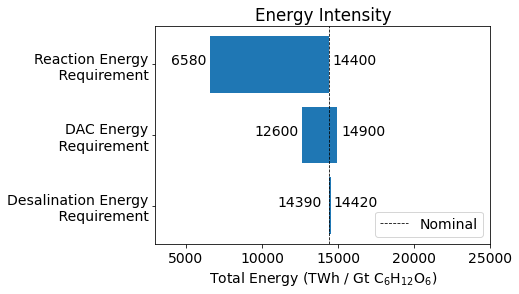

In [15]:
#Plot Generation
#Total Energy tornado
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14)
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Desalination Energy\n Requirement'],
        values = [E_sen_1[19]-E_sen_1[0] ,E_sen_2[19]-E_sen_2[0], 150],
        start = [E_sen_1[0],E_sen_2[0],E_sen_3[0]]
    )
)


df_sorted = df.sort_values('values')

fig, ax = plt.subplots()
p=ax.barh('params','values', data=df_sorted,left='start')
ax.set_title('Energy Intensity')
ax.set_xlabel('Total Energy (TWh / Gt C$_6$H$_{12}$O$_6$)')
ax.axvline(14389, color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax.legend(loc='lower right')
ax.set_xlim(left=3000)
ax.set_xlim(right=25000)

print('Nominal Case: 14,400 TWh / Gt glucose')

#label right
plt.text(14600,2,'14400')
plt.text(15200,1,'14900')
plt.text(14700,0,'14420')
#label left
plt.text(4000,2,'6580')
plt.text(9500,1,'12600')
plt.text(11000,0,'14390')

plt.savefig('energytornado.pdf',bbox_inches='tight')
plt.savefig('energytornado.png',bbox_inches='tight')
plt.show()

### GHG Emissions Intensity, Panel (b) 

In [8]:
#Parameter Variation
#Parameter: DAC energy requirement
E_DAC = np.linspace(50,300,20)
co2_sen_1 = np.zeros(len(E_DAC))

for i in range(len(E_DAC)):
    co2_sen_1[i]=emissions_intensity(44,180,6,10,energy=energy_intensity(E_DAC[i],0.4,7863,1,6,180))[0]
    
#Parameter: Reaction energy requirement
E_reaction = np.linspace(2804.8,7863,20)
co2_sen_2 = np.zeros(len(E_reaction))

for i in range(len(E_reaction)):
    co2_sen_2[i]=emissions_intensity(44, 180, 6, 10,energy=energy_intensity(243,0.4,E_reaction[i],1,6,180))[0]
    
#Parameter: Water efficiency
water_efficiency = np.linspace(1,10,20)
co2_sen_3 = np.zeros(len(water_efficiency))

for i in range(len(water_efficiency)):
    co2_sen_3[i]=emissions_intensity(44, 180, 6, 10,energy=energy_intensity(243,0.4,7863,water_efficiency[i],6,180))[0]  
    
#Parameter: Solar CO2 intensity
CO2_intensity_s = np.linspace(3,38,20)
co2_sen_4 = np.zeros(len(CO2_intensity_s))

for i in range(len(CO2_intensity_s)):
    co2_sen_4[i]=emissions_intensity(44, 180, 6, CO2_intensity_s[i],energy=energy_intensity(243,0.4,7863,1,6,180))[0]

#Parameter: NG CO2 intensity
CO2_intensity_ng = np.linspace(450,670,20)
co2_sen_5 = np.zeros(len(CO2_intensity_ng))


for i in range(len(CO2_intensity_ng)):
    co2_sen_5[i]=emissions_intensity(44, 180, 6, CO2_intensity_ng[i],energy=energy_intensity(243,0.4,7863,1,6,180))[0]

#Parameter: Coal CO2 intensity
CO2_intensity_c = np.linspace(675,1689,20)
co2_sen_6 = np.zeros(len(CO2_intensity_c))

for i in range(len(CO2_intensity_c)):
    co2_sen_6[i]=emissions_intensity(44, 180, 6, CO2_intensity_c[i],energy=energy_intensity(243,0.4,7863,1,6,180))[0]

Nominal case: -1.32 Gt CO2eq / Gt glucose


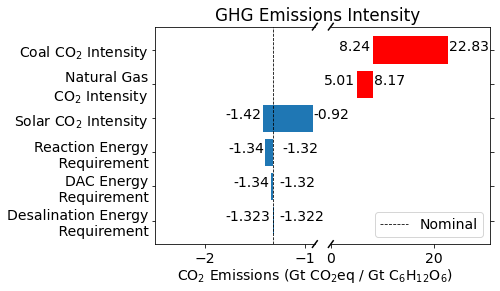

In [103]:
#Plot Generation
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Solar CO$_2$ Intensity','Desalination Energy\n Requirement','Natural Gas\n CO$_2$ Intensity','Coal CO$_2$ Intensity'],
        values = [co2_sen_1[19]-co2_sen_1[0] ,co2_sen_2[19]-co2_sen_2[0],co2_sen_4[19]-co2_sen_4[0],0.017,co2_sen_5[19]-co2_sen_5[0],co2_sen_6[19]-co2_sen_6[0]],
        start = [co2_sen_1[0],co2_sen_2[0],co2_sen_4[0],co2_sen_3[0],co2_sen_5[0],co2_sen_6[0]]
  
    )
)

df_sorted = df.sort_values('values')

fig, (ax,ax2) = plt.subplots(1,2,sharey=True)
p=ax.barh('params','values', data=df_sorted,left='start')
h=ax2.barh('params','values', data=df_sorted,left='start',color='red')
plt.suptitle('GHG Emissions Intensity',y=0.95)
ax.set_xlabel('CO$_2$ Emissions (Gt CO$_2$eq / Gt C$_6$H$_{12}$O$_6$)')
ax2.axvline(-1.32, color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax.axvline(-1.32, color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax2.legend(loc='lower right')
ax.set_xlim(left=-2.5,right=-0.9)
ax2.set_xlim(left=0,right=31)
fig.subplots_adjust(wspace=0.1)
ax.xaxis.set_label_coords(1,-0.1)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
#ax.tick_params(labelright='off')

ax2.yaxis.tick_right()

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

print('Nominal case: -1.32 Gt CO2eq / Gt glucose')

#label right
plt.text(23,5,'22.83')
plt.text(8.3,4,'8.17')
plt.text(-3.3,3,'-0.92')
plt.text(-9.5,2,'-1.32')
plt.text(-10,1,'-1.32')
plt.text(-10,0,'-1.322')
#label left
plt.text(1.6,5,'8.24')
plt.text(-1.3,4,'5.01')
plt.text(-20.5,3,'-1.42')
plt.text(-20,2,'-1.34')
plt.text(-19,1,'-1.34')
plt.text(-20.5,0,'-1.323')

plt.savefig('ghgemissionstornado.pdf',bbox_inches='tight')
plt.savefig('ghgemissionstornado.png',bbox_inches='tight')
plt.show()

### Land-use Intensity, Panel (c)

In [10]:
#Parameter Variation
#Parameter: Reaction energy req
E_reaction = np.linspace(2804,7863,20)
land_u1 = np.zeros(len(E_reaction))

for i in range(len(E_reaction)):
    land_u1[i]= land_intensity(energy=energy_intensity(243,0.4,E_reaction[i],1,6,180),lau=500)/1e6

#Parameter: DAC energy req
E_DAC = np.linspace(50,300,20)
land_u2=np.zeros(len(E_DAC))

for i in range(len(E_DAC)):
    land_u2[i]= land_intensity(energy=energy_intensity(E_DAC[i],0.4,7863,1,6,180),lau=500)/1e6

#Parameter: Water efficiency
water_efficiency = np.linspace(1,10,20)
land_u3 = np.zeros(len(water_efficiency))

for i in range(len(water_efficiency)):
    land_u3[i]= land_intensity(energy=energy_intensity(243,0.4,7863,water_efficiency[i],6,180),lau=500)/1e6

#Parameter: LAU factor
lau_factor = np.linspace(229,552,20)
land_u4 = np.zeros(len(lau_factor))

for i in range(len(lau_factor)):
    land_u4[i] = land_intensity(energy=energy_intensity(243,0.4,7863,1,6,180),lau=lau_factor[i])/1e6

Nominal case: 0.72 million hectares / Gt glucose


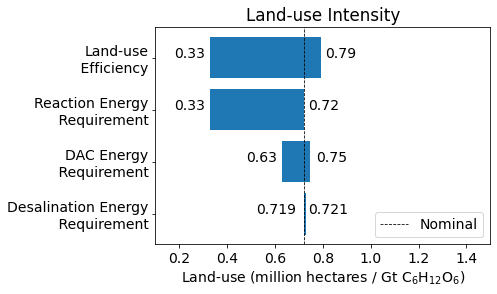

In [17]:
#Plot Generation
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Desalination Energy\n Requirement','Land-use\n Efficiency'],
        values = [land_u2[19]-land_u2[0] ,land_u1[19]-land_u1[0], 0.008, land_u4[19]-land_u4[0]],
        start = [land_u2[0],land_u1[0],land_u3[0],land_u4[0]]
    )
)


df_sorted = df.sort_values('values')

fig, ax = plt.subplots()
p=ax.barh('params','values', data=df_sorted,left='start')
ax.set_title('Land-use Intensity')
ax.set_xlabel('Land-use (million hectares / Gt C$_6$H$_{12}$O$_6$)')
ax.axvline(0.72, color='black', linewidth=0.8, linestyle='--',label='Nominal')
ax.legend(loc='lower right')
ax.set_xlim(left=.1)
ax.set_xlim(right=1.5)

print('Nominal case: 0.72 million hectares / Gt glucose')

#label right
plt.text(0.81,3,'0.79')
plt.text(0.74,2,'0.72')
plt.text(0.77,1,'0.75')
plt.text(0.74,0,'0.721')
#label left
plt.text(0.18,3,'0.33')
plt.text(0.18,2,'0.33')
plt.text(0.48,1,'0.63')
plt.text(0.52,0,'0.719')

plt.savefig('landusetornado.pdf', bbox_inches='tight')
plt.savefig('landusetornado.png',bbox_inches='tight')

plt.show()

### Artificial Carbohydrate Cost, Panel (d)

In [12]:
#Parameter Variation
#Parameter: DAC energy req
E_DAC = np.linspace(50,300,20)
cost_sen_1 = np.zeros(len(E_DAC))

for i in range(len(E_DAC)):
    cost_sen_1[i]= carb_cost(energy=energy_intensity(E_DAC[i],0.4,7863,1,6,180), energy_cost=80)/1e12
    
#Parameter: Reaction energy req
E_reaction = np.linspace(2804,7863,20)
cost_sen_2 = np.zeros(len(E_reaction))

for i in range(len(E_reaction)):
    cost_sen_2[i]= carb_cost(energy=energy_intensity(243,0.4,E_reaction[i],1,6,180), energy_cost=80)/1e12
    
#Parameter: Solar Energy cost
energy_cost_s = np.linspace(50,200,20)
cost_sen_3 = np.zeros(len(energy_cost_s))

for i in range(len(energy_cost_s)):
    cost_sen_3[i]= carb_cost(energy=energy_intensity(243,0.4,7863,1,6,180), energy_cost=energy_cost_s[i])/1e12

#Parameter: Water efficiency
water_efficiency = np.linspace(1,10,20)
cost_sen_4 = np.zeros(len(water_efficiency))

for i in range(len(water_efficiency)):
    cost_sen_4[i]= carb_cost(energy=energy_intensity(243,0.4,7863,water_efficiency[i],6,180), energy_cost=80)/1e12
    
#Parameter: NG Energy cost
energy_cost_ng = np.linspace(50,166,20)
cost_sen_5 = np.zeros(len(energy_cost_ng))

for i in range(len(energy_cost_ng)):
    cost_sen_5[i]= carb_cost(energy=energy_intensity(243,0.4,7863,1,6,180), energy_cost=energy_cost_ng[i])/1e12

#Parameter: Coal Energy cost
energy_cost_c = np.linspace(50,112,20)
cost_sen_6 = np.zeros(len(energy_cost_c))

for i in range(len(energy_cost_c)):
    cost_sen_6[i]= carb_cost(energy=energy_intensity(243,0.4,7863,1,6,180), energy_cost=energy_cost_c[i])/1e12

Nominal case: 1.15 trillion USD / Gt glucose


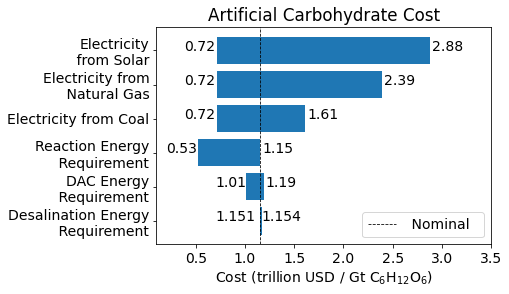

In [18]:
#Plot Generation
df = pd.DataFrame(
    dict(
        params = ['DAC Energy\n Requirement','Reaction Energy\n Requirement','Electricity\n from Solar','Desalination Energy\n Requirement','Electricity from\n Natural Gas','Electricity from Coal'],
        values = [cost_sen_1[19]-cost_sen_1[0] ,cost_sen_2[19]-cost_sen_2[0],cost_sen_3[19]-cost_sen_3[0],0.018,cost_sen_5[19]-cost_sen_5[0],cost_sen_6[19]-cost_sen_6[0]],
        start = [cost_sen_1[0],cost_sen_2[0],cost_sen_3[0],cost_sen_4[0],cost_sen_5[0],cost_sen_6[0]]
    )
)


df_sorted = df.sort_values('values')

fig, ax = plt.subplots()

p=ax.barh('params','values', data=df_sorted,left='start')
ax.set_title('Artificial Carbohydrate Cost')
ax.set_xlabel('Cost (trillion USD / Gt C$_6$H$_{12}$O$_6$)')
ax.axvline(1.15, color='black', linewidth=0.8, linestyle='--',label=' Nominal  ')
ax.legend()
ax.set_xlim(left=0.1)
ax.set_xlim(right=3.5)

#label right
plt.text(2.9,5,'2.88',fontsize=14)
plt.text(2.41,4,'2.39',fontsize=14)
plt.text(1.63,3,'1.61',fontsize=14)
plt.text(1.18,2,'1.15',fontsize=14)
plt.text(1.21,1,'1.19',fontsize=14)
plt.text(1.17,0,'1.154',fontsize=14)
#label left
plt.text(0.38,5,'0.72',fontsize=14)
plt.text(0.38,4,'0.72',fontsize=14)
plt.text(0.38,3,'0.72',fontsize=14)
plt.text(0.2,2,'0.53',fontsize=14)
plt.text(.7,1,'1.01',fontsize=14)
plt.text(.7,0,'1.151',fontsize=14)

print('Nominal case: 1.15 trillion USD / Gt glucose')

plt.savefig('costtornado.pdf',bbox_inches='tight')
plt.savefig('costtornado.png',bbox_inches='tight')
plt.show()

## Two Dimentional Sensitivity

This section of code generates Figure S1 in the SI.

### Energy Intensity, Panel (a)

In [59]:
#Create Mesh
E_reaction=np.linspace(2804,8000,20)
E_DAC=np.linspace(50,300,20)

r,dac = np.meshgrid(E_reaction,E_DAC)

total_E = energy_intensity(dac, 0.4, r, 1,6, 180)/1000000000 * 2.778e-7 * 1e12

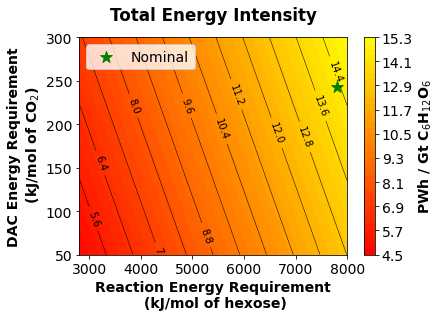

In [61]:
#Generate Plot
fig, ax = plt.subplots()
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14)
plt.contourf(r,dac,total_E, cmap='autumn',levels=40)
cbar=plt.colorbar()
c3 = plt.contour(r,dac,total_E, colors='black', linewidths=0.5, levels=12)
plt.scatter(7800,243, color="green",s=150, label = "Nominal", marker = "*")
plt.title('Total Energy Intensity',weight = 'bold',y=1.05)
plt.xlabel('Reaction Energy Requirement\n (kJ/mol of hexose)',weight = 'bold')
plt.legend(loc ='upper left')
ax.clabel(c3, c3.levels, inline=True, fontsize=10)
plt.ylabel('DAC Energy Requirement\n (kJ/mol of CO$_2$)',weight = 'bold')
cbar.set_label('PWh / Gt C$_6$H$_{12}$O$_6$',weight = 'bold')
plt.savefig('energyheatmap.png',bbox_inches='tight')
plt.savefig('energyheatmap.pdf',bbox_inches='tight')
plt.show()

### GHG Emissions Intensity, Panel (b)

In [72]:
#Create Mesh
E_reaction=np.linspace(2604,8000,20)
CO2_intensity=np.linspace(0,1750,20)

r,co2 = np.meshgrid(E_reaction,CO2_intensity)

emissions =  emissions_intensity(44,180,6,co2,energy=energy_intensity(243,0.4,r,1,6,180))[0]

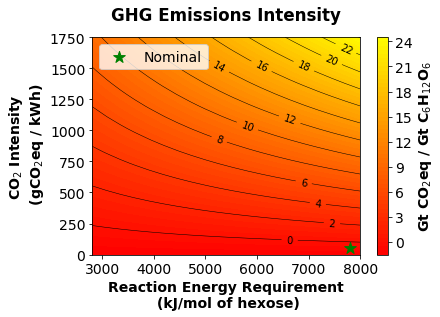

In [85]:
#Generate Plot
fig, ax = plt.subplots()

plt.contourf(r,co2,emissions, cmap='autumn',levels=60)
cbar = plt.colorbar()
cs = plt.contour(r,co2,emissions, colors='k', linewidths=0.5, levels=12)
#plt.plot(p_netzero,co2_netzero,netzero, color='k', linewidth=1.5)
plt.scatter(7800,50, color="green",s=150, label = "Nominal", marker = "*")
plt.title('GHG Emissions Intensity', weight='bold',y=1.05)
plt.xlabel('Reaction Energy Requirement\n (kJ/mol of hexose)',weight = 'bold')
plt.yticks([0,250,500,750,1000,1250,1500,1750])
plt.ylabel('CO$_2$ Intensity\n (gCO$_2$eq / kWh)',weight = 'bold')
plt.legend(loc='upper left')
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
cbar.set_label('Gt CO$_2$eq / Gt C$_6$H$_{12}$O$_6$',weight = 'bold')
plt.savefig('ghgheatmap.pdf',bbox_inches='tight')
plt.savefig('ghgheatmap.png',bbox_inches='tight')
plt.show()

### Land-use Intensity, Panel (c)

In [83]:
#Create Mesh
E_reaction=np.linspace(2804,8000,20)
lau=np.linspace(229,551,20)

r,l = np.meshgrid(E_reaction,lau)

land = land_intensity(energy=energy_intensity(243,0.4,r,1,6,180),lau=l)/1e6

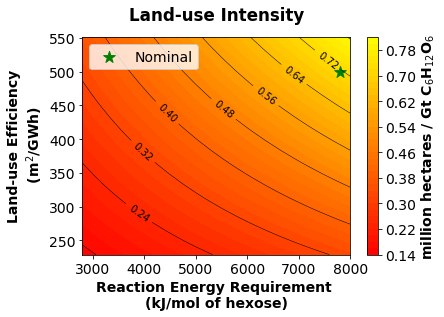

In [102]:
#Generate Plot
plt.contourf(r,l,land, cmap='autumn',levels=40)
cbar = plt.colorbar()
c1 = plt.contour(r,l,land, colors='k', linewidths=0.5, levels=9)
plt.scatter(7800,500, color="green",s=150, label = "Nominal", marker = "*")
plt.title('Land-use Intensity', weight='bold',y=1.05)
plt.xlabel('Reaction Energy Requirement \n(kJ/mol of hexose)',weight = 'bold')
plt.ylabel('Land-use Efficiency\n (m$^2$/GWh)',weight = 'bold')
plt.legend(loc = 'upper left')
ax.clabel(c1, c1.levels, inline=True, fontsize=10)
cbar.set_label('million hectares / Gt C$_6$H$_{12}$O$_6$',weight = 'bold')
plt.savefig('landheatmap.png',bbox_inches='tight')
plt.savefig('landheatmap.pdf',bbox_inches='tight')
plt.show()

### Artificial Carbohydrate Cost, Panel (d)

In [96]:
#Create Mesh
E_reaction=np.linspace(2804,8000,20)
cost=np.linspace(50,200,20)

r,c = np.meshgrid(E_reaction,cost)

price = carb_cost(energy=energy_intensity(243,0.4,r,1,6,180), energy_cost=c)/1e12

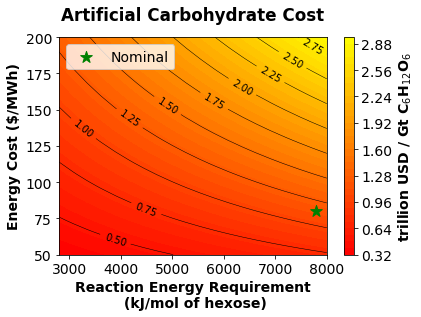

In [97]:
#Generate Plot
plt.contourf(r,c,price, cmap='autumn', levels=40)
cbar = plt.colorbar()
c2 = plt.contour(r,c,price, colors='k', linewidths=0.5, levels=11)
plt.scatter(7800,80, color="green",s=150, label = "Nominal", marker = "*")
plt.title('Artificial Carbohydrate Cost', weight='bold',y=1.05)
plt.xlabel('Reaction Energy Requirement\n (kJ/mol of hexose)',weight = 'bold')
plt.ylabel('Energy Cost ($/MWh)',weight = 'bold')
plt.legend(loc='upper left')
ax.clabel(c2, c2.levels, inline=True, fontsize=10)
cbar.set_label('trillion USD / Gt C$_6$H$_{12}$O$_6$',weight = 'bold')
plt.savefig('costheatmap.png',bbox_inches='tight')
plt.savefig('costheatmap.pdf',bbox_inches='tight')
plt.show()